# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [83]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [84]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [116]:
#  1. Get the total rides for each city type
rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
print(rides_by_type)

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64


In [117]:
# 2. Get the total drivers for each city type
drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]
print(drivers_by_type)

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64


In [118]:
#  3. Get the total amount of fares for each city type
fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
print(fares_by_type)

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64


In [88]:
#  4. Get the average fare per ride for each city type. 
avg_fares_by_rides = pyber_data_df.groupby(["type"]).sum()["fare"] / rides_by_type
print(avg_fares_by_rides)

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [119]:
# 5. Get the average fare per driver for each city type. 
avg_fare_by_driver = pyber_data_df.groupby(["type"]).sum()["fare"] / drivers_by_type
print(avg_fare_by_driver)

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64


In [121]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({"Total Rides":rides_by_type.map("{:,.0f}".format),
                                 "Total Driver":drivers_by_type,
                                 "Total Fares":fares_by_type.map("${:,.2f}".format),
                                 "Average Fare per Ride":avg_fares_by_rides.map("${:,.2f}".format),
                                 "Average Fare per Driver":avg_fare_by_driver})
pyber_summary_df

,Total Rides,Total Driver,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,"$4,327.93",$34.62,55.486282
Suburban,625,490,"$19,356.33",$30.97,39.502714
Urban,"1,625",2405,"$39,854.38",$24.53,16.571468


In [91]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [92]:
#  8. Format the columns.
pyber_summary_df = pd.DataFrame({"Total Rides":rides_by_type.map("{:,.0f}".format),
                                 "Total Driver":drivers_by_type.map("{:,.0f}".format),
                                 "Total Fares":fares_by_type.map("${:,.2f}".format),
                                 "Average Fare per Ride":avg_fares_by_rides.map("${:,.2f}".format),
                                 "Average Fare per Driver":avg_fare_by_driver.map("${:,.2f}".format)})
pyber_summary_df

,Total Rides,Total Driver,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [133]:
# 9. Using groupby() on the pyber_data_df to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fares_by_week_by_type_df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
fares_by_week_by_type_df.head(10)


fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
      2019-01-08 06:19:45  19.39
      2019-01-09 15:30:35  31.84
      2019-01-11 04:39:27  16.42
      2019-01-14 07:09:17  18.05
      2019-01-14 15:58:48  54.10

In [134]:
# 10. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fares_by_week_by_type_df = fares_by_week_by_type_df.reset_index()
fares_by_week_by_type_df.head(10)



,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
5,Rural,2019-01-08 06:19:45,19.39
6,Rural,2019-01-09 15:30:35,31.84
7,Rural,2019-01-11 04:39:27,16.42
8,Rural,2019-01-14 07:09:17,18.05
9,Rural,2019-01-14 15:58:48,54.10


In [111]:
# 11. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

pivot_fares_week_type = fares_by_week_by_type_df.pivot(index="date", columns="type", values="fare")
pivot_fares_week_type.head(10)


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [112]:
# 12. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2018-01-01':'2018-04-29'.
pivot_fares_week_type_df = pivot_fares_week_type.loc["2019-01-01 00:00:00":"2019-04-29 23:59:59"]
pivot_fares_week_type_df.head(10)


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [113]:
# 13. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
pivot_fares_week_type_df.index = pd.to_datetime(pivot_fares_week_type_df.index)
pivot_fares_week_type_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [125]:
# 14. Check that the datatype for the index is datetime using df.info()
print(pivot_fares_week_type_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2218 entries, 2019-01-01 00:08:16 to 2019-04-29 23:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  579 non-null    float64
 2   Urban     1523 non-null   float64
dtypes: float64(3)
memory usage: 69.3 KB
None


In [127]:
# 15. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
w_pivot_fares_week_type = pivot_fares_week_type_df.resample("W").sum()
w_pivot_fares_week_type.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


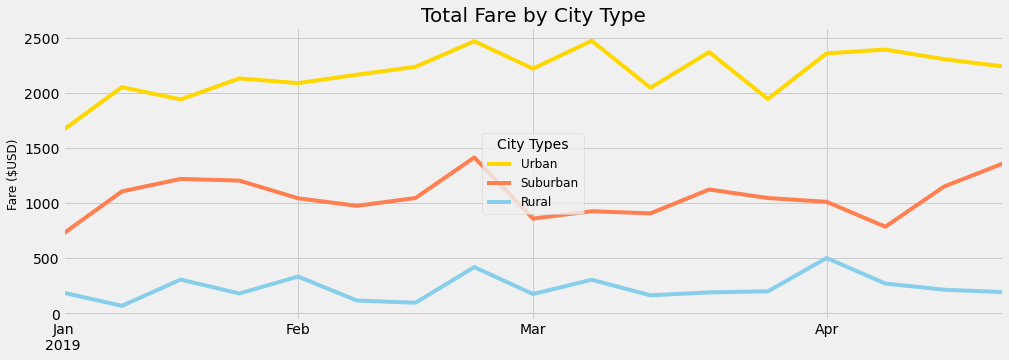

<Figure size 432x288 with 0 Axes>

In [115]:
# 16. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
weekly_fares = w_pivot_fares_week_type.loc["2019-01-01 00:00:00":"2019-04-29 23:59:59"]
urban_weekly_fares = weekly_fares["Urban"]
suburban_weekly_fares = weekly_fares["Urban"]
rural_weekly_fares = weekly_fares["Rural"]
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

ax = plt.gca()
weekly_fares.plot(kind='line', y="Urban", color="gold", figsize=(15, 5), ax=ax)
weekly_fares.plot(kind='line', y="Suburban", color="coral", ax=ax)
weekly_fares.plot(kind='line', y="Rural", color="skyblue", ax=ax)
lgnd = plt.legend(fontsize="12", mode="Expanded",scatterpoints=1, loc="best", title="City Types")
plt.title("Total Fare by City Type",fontsize=20)
plt.ylabel("Fare ($USD)", fontsize=12)
plt.xlabel("", fontsize=12)
plt.grid(True)
plt.show()
plt.savefig("analysis/Pyber_fare_summary.png")

